In [105]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [107]:
df = pd.read_csv("./data/wine.csv")

In [109]:
df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- alcohol : 알코올 도수
- sugar : 당도
- pH : pH값
- class : 타깃값. 0이면 레드와인, 1이면 화이트와인

In [112]:
df.shape

(6497, 4)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [116]:
df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [118]:
# 데이터 분할
x = df.drop("class", axis = 1)
y = df["class"]

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 26)

In [122]:
x_train.shape, x_test.shape

((5197, 3), (1300, 3))

In [124]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [126]:
# 로지스틱 회귀
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.7819896093900327
0.7807692307692308


In [128]:
logi.coef_, logi.intercept_

(array([[ 0.54435293,  1.61800398, -0.7194883 ]]), array([1.76898932]))

- 로지스틱 모델은 이해하기 어려움
  - 왜 저런 계수값이 나왔는지 이해하기 어려움
  - 알코올 도수와 당도가 높을수록, pH가 낮을수록 화이트와인일 가능성이 높음
  - 만약에 다항특성과 하이퍼파라미터 튜닝이 추가되면 더 설명하기 어려운 모델이 됨

# 의사 결정 나무

<img src = "./image/decision_tree.png">

- 의의
    - 한 번에 하나씩의 독립 변수를 사용하여 예측 가능한 규칙들의 집합을 생성하는 알고리즘
    - 질문을 던져서 대상을 좁혀나가는 스무고개와 비슷한 개념
    - 분류와 회귀 모두 가능함
        - 범주형 데이터, 연속형 데이터 모두 예측 가능
- 장점
    - 다른 지도학습 기법들에 비해 해석이 쉬움
    - 유용한 독립변수를 파악할 수 있음
    - 선형성, 정규성, 등분산성 등의 수학적 가정이 불필요한 비모수적 모형임
    - 스케일링을 할 필요가 없음
        - 스케일링이 의사결정나무 알고리즘에 아무런 영향을 주지 않음
- 단점
    - 성능이 떨어지는 경우가 많음
    - 분류 기준값의 경계선 주변의 자료에서는 오차가 클 수 있음
    - 각 예측 변수의 효과를 파악하기 어려움
    - 예측이 불안정할 수 있음 

In [133]:
dt = DecisionTreeClassifier(random_state = 26)
dt.fit(scaled_train, y_train)
print(dt.score(scaled_train, y_train))
print(dt.score(scaled_test, y_test))

0.9974985568597268
0.8630769230769231


## 시각화

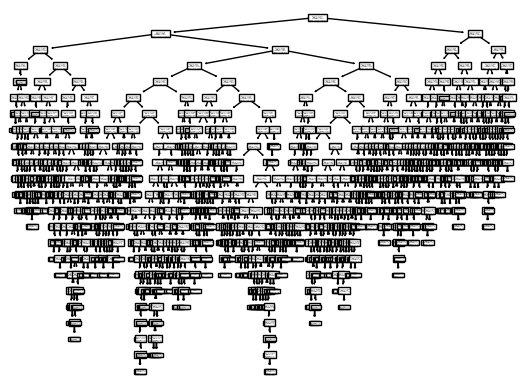

In [136]:
plt.figure()
plot_tree(dt)
plt.show()

- 모델이 너무 복잡하기 때문에 트리의 깊이를 제한해서 출력할 필요가 있음
  - max_depth : 루트 노드를 제외하고 더 확장하여 그릴 깊이
  - filled : 클래스에 맞게 색을 칠함
  - feature_names : 특성의 이름을 전달

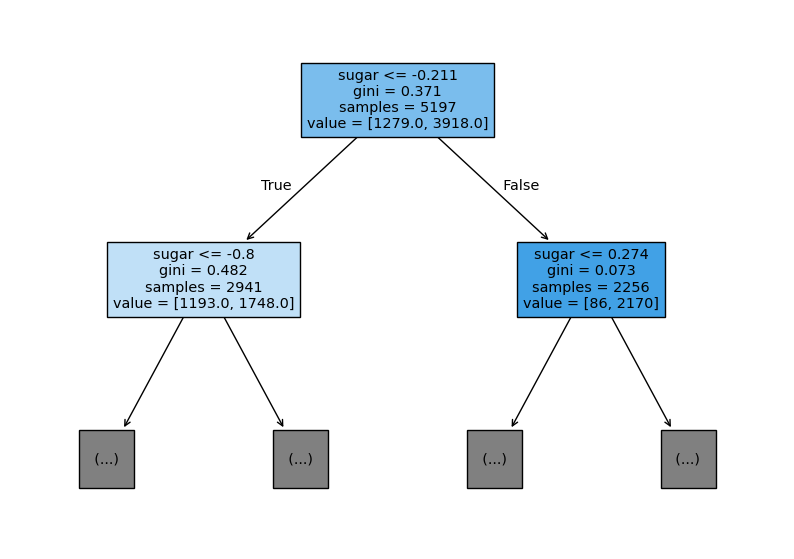

In [138]:
plt.figure(figsize = (10, 7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ["alcohol", "sugar", "pH"])
plt.show()

### 시각화 해석 방법

- 맨 위의 노드를 root node(루트 노드), 맨 아래의 노드를 leaf node(리프 노드)라고 함

1. 루트 노드는 sugar 가 -0.211 이하인지 질문
    - 각 데이터 샘플의 sugar가 -0.211 이하이면 왼쪽 가지로 이동
    - 그렇지 않으면 오른쪽 가지로 이동
    - 루트 노드의 총 샘플 수는 5197개
        - 이 중에서 음성 클래스(레드 와인)는 1279개
        - 양성 클래스(화이트 와인)는 3918개   
2. 왼쪽 노드는 sugar 가 -0.8 이하인지 질문
    - yes는 왼쪽 가지, no 는 오른쪽 가지로 이동
    - 노드의 총 샘플 수는 2941개
        - 음성클래스와 양성 클래스 개수는 각각 1193, 1748개
3. 오른쪽 노드는 sugar 가 0.274 이하인지 질문
    - 노드의 총 샘플 수는 2256개
        - 음성 클래스와 양성 클래스 개수는 각각 86개, 2170개

- 왼쪽 노드는 색깔이 더 연해지고 오른쪽 노드는 더 진해짐
    - 양성 클래스의 비율이 높아질수록 진한 색으로 표시됨
- 예측 방법은 리프 노드에서 가장 많은 클래스가 예측 클래스가 됨
    - 만약에 이 단계에서 성장을 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플 모두 양성 클래스로 예측됨
- 불순도
    - Gini impurity(지니 불순도)
    - DecisionTreeClassifier 의 criterion 매개변수의 기본값이 gini
    - criterion
        - 노드에서 데이터를 분할할 기준
        - 지니 불순도 계산식
            - 지니 불순도 = 1 - (음성클래스비율^2 + 양성클래스비율^2)
            - 예) 1 - ((1279/5197)^2 + (3918/5197)^2) = 0.371

In [140]:
1 - ((1279/5197) ** 2 + (3918/5197) ** 2)

0.37107315616915937

In [141]:
# 순수 노드 지니 불순도
1 - ((0 / 100) ** 2 + (100 / 100) ** 2)

0.0

In [142]:
# 최악의 지니 불순도
1 - ((50 / 100) ** 2 + (50 / 100) ** 2)

0.5

- 따라서 의사 결정 나무 모델은 parent node(부모 노드)와 child node(자식 노드)의 불순도 차이가 가능한 크도록 트리를 성장시킴
    - 불순도의 차이
        - 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도

In [144]:
0.371 - (2941 / 5197) * 0.482 - (2256 / 5197) * 0.073

0.06654550702328269

- 이런 부모 노드와 자식 노드 사이의 불순도 차이를 information gain(정보 이득) 이라고 부름
    - 의사결정나무 알고리즘은 정보 이득이 최대가 되도록 데이터를 나눔
        - 이 때 사용하는 기준이 지니 불순도
        - 사이킷런에서 제공하는 또 다른 불순도 기준으로는 엔트로피 불순도가 있음        
    - 즉, 노드를 순수하게 나눌수록 정보 이득이 커짐

### 가지치기

- 깊이에 제한을 두지 않고 무작정 끝까지 자라나는 트리를 만들게 되면 훈련 세트에는 아주 잘 맞지만 테스트 세트에는 적합하지 않은 과대적합 모델이 되어 일반화가 잘 되지 않음
- 트리의 성장을 제한하는 방법이 가지치기
    - 가장 간단한 가지치기 방법은 트리의 최대 깊이를 지정하는 것

In [147]:
# 최대 깊이 3인 의사결정나무 모델
dt = DecisionTreeClassifier(max_depth = 3, random_state = 26)
dt.fit(scaled_train, y_train)
print(dt.score(scaled_train, y_train))
print(dt.score(scaled_test, y_test))

0.8454877814123533
0.8369230769230769


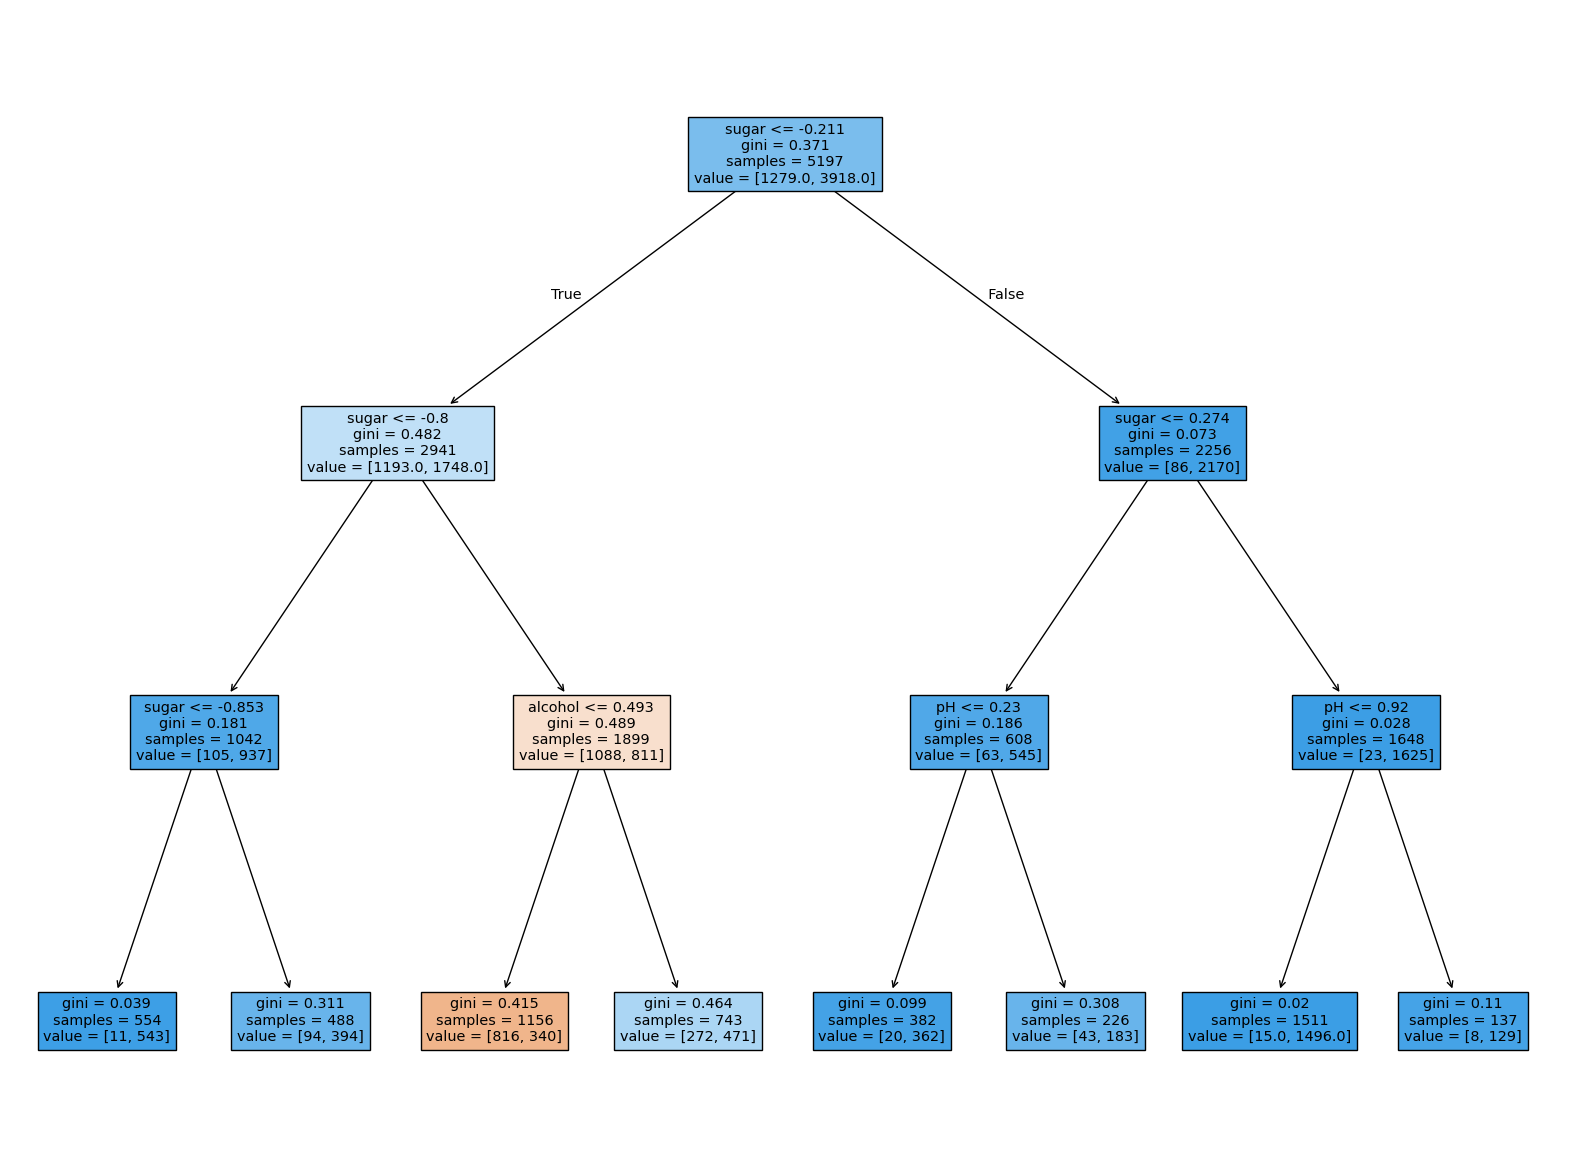

In [148]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ["alcohol", "sugar", "pH"])
plt.show()

In [149]:
# 스케일링을 하지 않은 의사결정나무
dt = DecisionTreeClassifier(max_depth = 3, random_state = 26)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.8454877814123533
0.8369230769230769


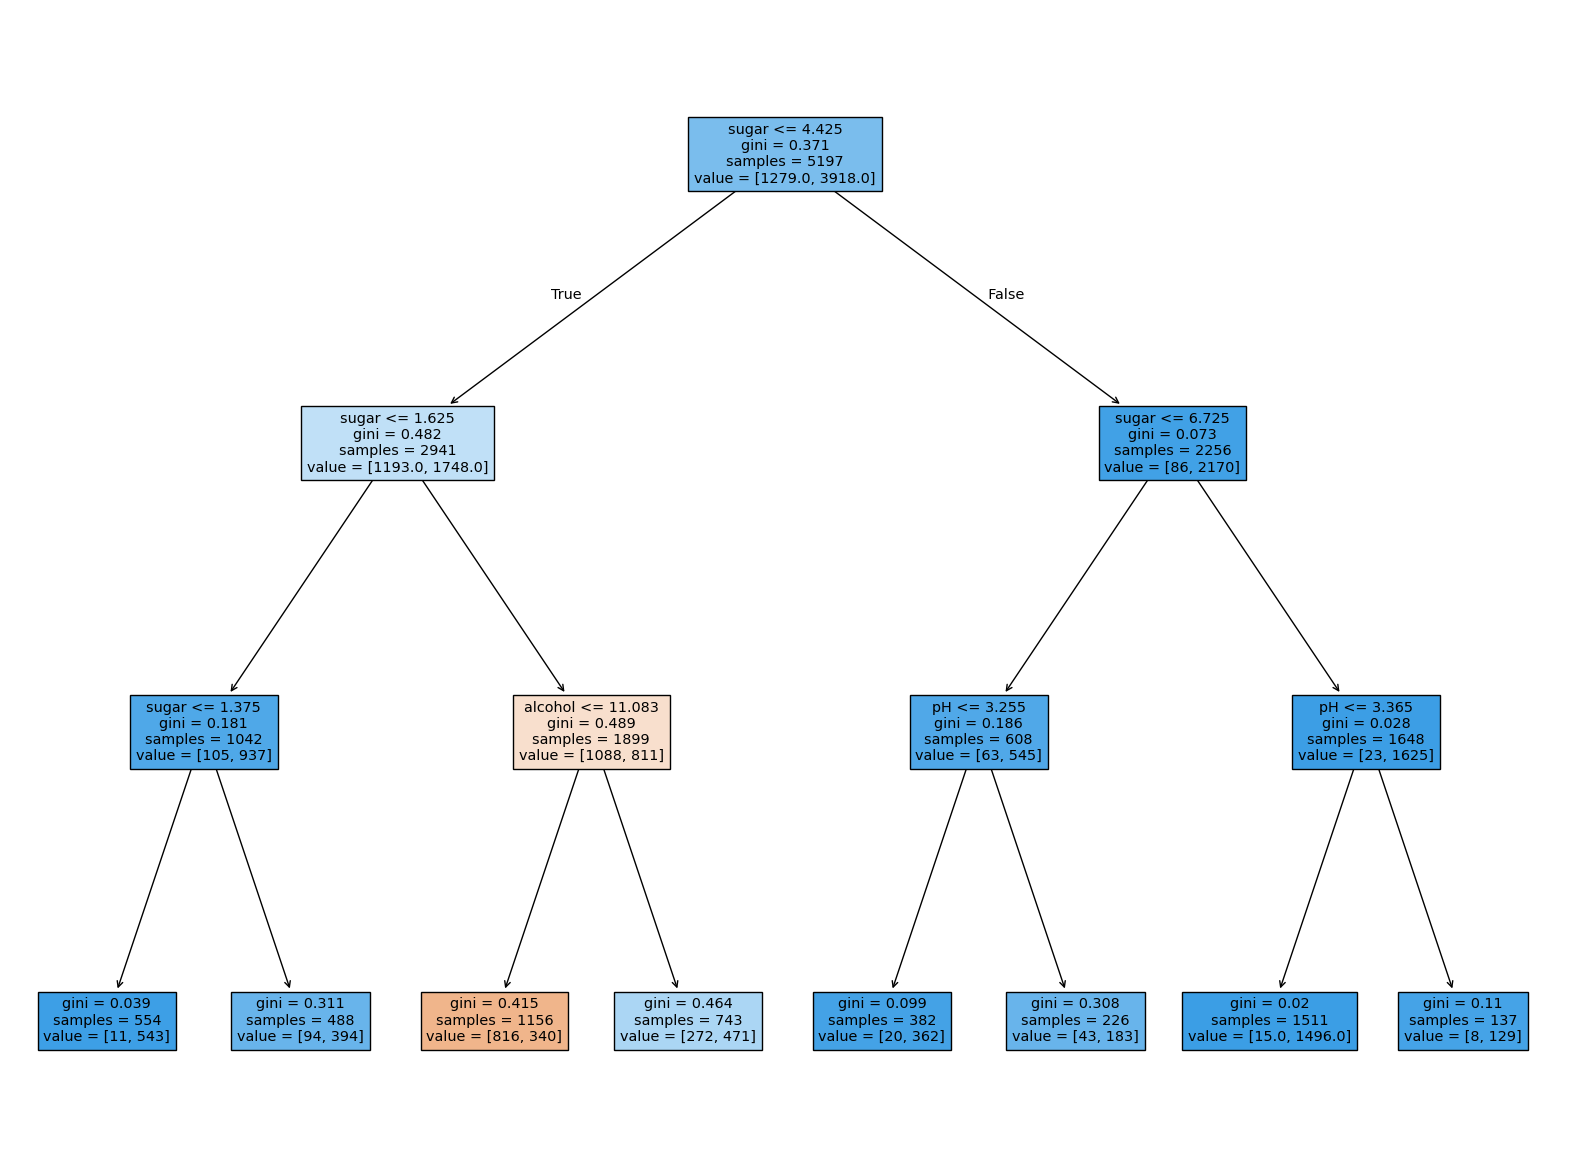

In [150]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ["alcohol", "sugar", "pH"])
plt.show()

- 당도가 1.625와 4.425 사이이면서 알코올 도수가 11.083이하인 것이 레드와인

In [152]:
print(dt.feature_importances_)

[0.13425818 0.8580405  0.00770132]


- 특성 중요도
    - 어떤 특성이 가장 유용한지 나타내는 지표
    - 두 번째 특성인 sugar가 0.85로 가장 높음. alcohol, pH 순
    - 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산
    - 특성 중요도를 활용하여 변수 선택에 활용할 수 있음